In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unidecode import unidecode

In [2]:
page = requests.get("https://www.kebab-frites.com/meilleur-kebab/paris-d54.html")

In [3]:
soup = BeautifulSoup(page.content, 'html.parser')

In [4]:
div_articles_kebab = soup.find('div', {"class":"thumb col4"})

In [5]:
articles_kebab = div_articles_kebab.find_all("article")

In [6]:
arrondissements = []
rues = []
for l in articles_kebab:
    rues.append(l.find_all('p')[0].get_text(separator=' / ').split(' / ')[0])
    arrondissements.append(l.find_all('p')[0].get_text(separator=' / ').split(' / ')[1])

In [7]:
arrondissements

['75020 Paris 20',
 '75005 Paris 05',
 '75017 Paris 17',
 '75017 Paris 17',
 '75010 Paris 10',
 '75005 Paris 05',
 '75019 Paris 19',
 '75019 Paris 19',
 '75016 Paris 16',
 '75014 Paris 14',
 '75020 Paris 20',
 '75009 Paris 09',
 '75005 Paris 05',
 '75014 Paris 14',
 '75017 Paris 17',
 '75012 Paris 12',
 '75010 Paris 10',
 '75011 Paris 11',
 '75011 Paris 11',
 '75017 Paris 17',
 '75018 Paris 18',
 '75013 Paris 13',
 '75019 Paris 19',
 '75011 Paris 11',
 '75016 Paris 16',
 '75012 Paris 12',
 '75007 Paris 07',
 '75004 Paris 04',
 '75020 Paris 20',
 '75012 Paris 12',
 '75005 Paris 05',
 '75001 Paris 01',
 '75013 Paris 13',
 '75016 Paris 16',
 '75005 Paris 05',
 '75016 Paris 16',
 '75005 Paris 05',
 '75014 Paris 14',
 '75010 Paris 10',
 '75014 Paris 14',
 '75001 Paris 01',
 '75014 Paris 14',
 '75010 Paris 10',
 '75015 Paris 15',
 '75002 Paris 02',
 '75009 Paris 09',
 '75009 Paris 09',
 '75020 Paris 20',
 '75005 Paris 05',
 '75011 Paris 11']

In [8]:
nom = []
for l in articles_kebab:
    nom.append(l.find_all('a')[0].get_text().split(' - ')[1])

In [9]:
nom

['Streaters',
 'Casse Croute Grec',
 'Mondial Kebab',
 'Kebab Des Batignolles',
 'Ozlem Snack',
 'Délice Jussieu',
 'Restaurant Adana',
 'Taksim',
 'Repère Gourmand',
 'Ephès',
 'Buffet Dost',
 'Paristanbul',
 'La Voie Lactée',
 'Restaurant Antalya',
 'Ladess',
 'Restaurant Kiraz',
 'Chez Les 4 Frères Bedri',
 'Firat',
 'Mac Food',
 'Zelal',
 "L'original",
 'Bosphore',
 "Les délices d'amour",
 'Le Relais de la Bastille',
 'Dailyfood',
 'Sefa Antalya',
 'Apollon',
 "L'as du fallafel",
 'Chez les deux amis',
 'Cristal Doner',
 'Restaurant Gap',
 'Nabab Kebab',
 'La Grèce',
 'Le 32',
 "L' île De Crête",
 "Buffet d'Auteuil",
 'Le Cedre',
 'La paix',
 'Le Plaisir indien',
 'Restaurant Sibel',
 'Al Boustan',
 'Matisse',
 'Grill Istanbul',
 'Sandwicherie Grec',
 'Grillé',
 'Nabab Kebab',
 'Pacha Kebab',
 'Vitamin',
 'Restaurant Pacha',
 'Délices aux mille et une epices']

In [10]:
notes = []
for l in articles_kebab:
    notes.append(l.find('div', {"class":"stars"})['class'][1][1:])

In [11]:
notes

['6',
 '5',
 '5',
 '4',
 '5',
 '6',
 '5',
 '6',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '6',
 '5',
 '6',
 '5',
 '5',
 '5',
 '5',
 '2',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '4',
 '6',
 '5',
 '4',
 '5',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '4',
 '5',
 '3',
 '5',
 '5',
 '5']

In [12]:
avis = []
for l in articles_kebab:
    avis.append(l.find('div', {"class":"avis"}).get_text().split('\xa0')[0])

In [13]:
avis

['263',
 '104',
 '21',
 '123',
 '4',
 '35',
 '12',
 '3',
 '26',
 '22',
 '37',
 '6',
 '50',
 '33',
 '26',
 '19',
 '23',
 '3',
 '1',
 '24',
 '26',
 '15',
 '24',
 '6',
 '8',
 '29',
 '50',
 '21',
 '18',
 '18',
 '6',
 '24',
 '6',
 '20',
 '16',
 '141',
 '6',
 '30',
 '13',
 '11',
 '8',
 '5',
 '3',
 '7',
 '6',
 '19',
 '11',
 '7',
 '7',
 '12']

In [ ]:
df = pd.DataFrame({'Nom': nom, 'Rue': rues, 'Arrondissement': arrondissements, 'Note': notes, 'Avis': avis})

In [ ]:
df['Note'] = pd.to_numeric(df['Note'])
df['Avis'] = pd.to_numeric(df['Avis'])

In [ ]:
df = df.sort_values(by=['Note', 'Avis'], ascending=[False, False])

In [ ]:
df

,Nom,Rue,Arrondissement,Note,Avis
0,Streaters,39 Rue Des Pyrénées Paris 20,75020 Paris 20,6,263
5,Délice Jussieu,4 rue Linné,75005 Paris 05,6,35
16,Chez Les 4 Frères Bedri,38 Rue Louis Blanc,75010 Paris 10,6,23
33,Le 32,32 Rue Des Belles Feuilles,75016 Paris 16,6,20
7,Taksim,170 avenue Jean Jaures,75019 Paris 19,6,3
18,Mac Food,60 Rue Du Chemin Vert,75011 Paris 11,6,1
1,Casse Croute Grec,4 rue de l'Ecole Polytechnique,75005 Paris 05,5,104
12,La Voie Lactée,3 rue des ecoles,75005 Paris 05,5,50
10,Buffet Dost,92 rue d'Avron,75020 Paris 20,5,37
13,Restaurant Antalya,19 Rue Pernety,75014 Paris 14,5,33


<Axes: title={'center': 'Nombre de restaurants par arrondissement'}, xlabel='Arrondissement', ylabel='Nombre de restaurants'>

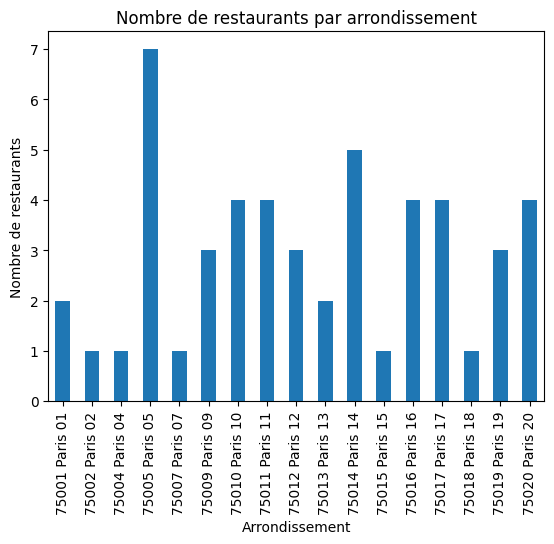

In [ ]:
restaurant_counts = df['Arrondissement'].value_counts().sort_index()
restaurant_counts.plot(kind='bar', xlabel='Arrondissement', ylabel='Nombre de restaurants', title='Nombre de restaurants par arrondissement')